In [35]:
def display_unitary(qc, prefix=""):
    """Simulates a simple circuit and display its matrix representation.
    Args:
        qc (QuantumCircuit): The circuit to compile to a unitary matrix
        prefix (str): Optional LaTeX to be displayed before the matrix
    Returns:
        None (displays matrix as side effect)
    """
    from qiskit import Aer
    from qiskit.visualization import array_to_latex
    sim = Aer.get_backend('aer_simulator')
    # Next, we'll create a copy of the circuit and work on
    # that so we don't change anything as a side effect
    qc = qc.copy()
    # Tell the simulator to save the unitary matrix of this circuit
    qc.save_unitary()
    unitary = sim.run(qc).result().get_unitary()
    display(array_to_latex(unitary, prefix=prefix))


In [31]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(2)

circuit.x(0)
circuit.x(1)

circuit.cz(1,0)

circuit.z(0)
circuit.z(1)

circuit.x(0)
circuit.x(1)

print(circuit)



     ┌───┐   ┌───┐┌───┐
q_0: ┤ X ├─■─┤ Z ├┤ X ├
     ├───┤ │ ├───┤├───┤
q_1: ┤ X ├─■─┤ Z ├┤ X ├
     └───┘   └───┘└───┘


<IPython.core.display.Latex object>

In [65]:
from qiskit.quantum_info import Statevector

new_circuit = QuantumCircuit(2,2)

new_circuit.h(0)
new_circuit.h(1)

new_circuit.x(0)
new_circuit.cz(1,0)
new_circuit.x(0)


print(new_circuit)


st = Statevector(new_circuit)
st.draw("latex")



     ┌───┐┌───┐   ┌───┐
q_0: ┤ H ├┤ X ├─■─┤ X ├
     ├───┤└───┘ │ └───┘
q_1: ┤ H ├──────■──────
     └───┘             
c: 2/══════════════════
                       


<IPython.core.display.Latex object>

In [66]:
from qiskit.providers.aer import AerSimulator

new_circuit.measure([0,1], [0,1])

sim = AerSimulator()
job = sim.run(new_circuit)
result = job.result()
print(result.get_counts())

{'01': 248, '11': 253, '10': 274, '00': 249}


{'10': 1}


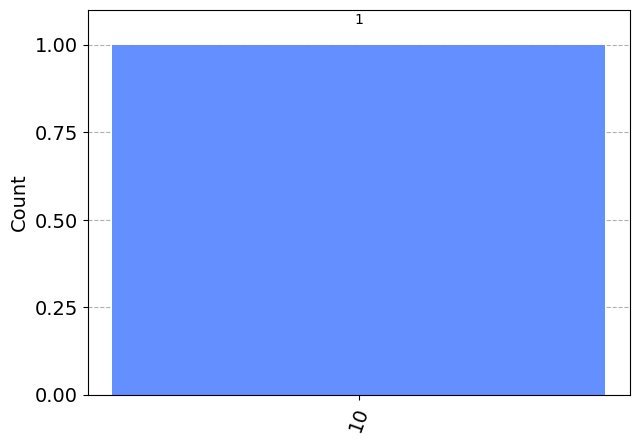

In [67]:
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

results = execute(new_circuit,Aer.get_backend('statevector_simulator')).result()
print(results.get_counts())
plot_histogram(results.get_counts())